# **Top Anime Exploratory Analysis**
#### *Kim Santos*
#### *Last updated: 12/07/2021*

---

# **Table of Contents**
* *[Introduction](#Introduction)*
* *[Setup](#Setup)*
* *[Web Scraping](#Web-Scraping)*
* *[Data Wrangling](#Data-Wrangling)*
* *[Exploratory Data Analysis](#Exploratory-Data-Analysis)*
* *[Overall Analysis](#Overall-Analysis)*
* *[Conclusion](#Conclusion)*

# **Introduction**

MyAnimeList (MAL) is one of the largest databases for end users to get information on anime and manga. The users within the MAL community provide daily updated information, and such information for anime are: <span style="color:darkblue"> **titles, scores, genres, types, episodes, status, aired, premiered, broadcasts, producers, licensors, studios, sources, duration, rating, popularity, members, favorite and rank.**</span>

### **Investigation**
This project will explore and analyze data gathered from the Top Anime in MAL. The objective will be to study the success of the Top 5 Studios producing animes by studying patterns and trends. The data will be collected from https://myanimelist.net/ through web scraping. Research questions are created and responded to that follows towards the objective and will involve statistical analyses and data visualizations.

**Objective**: Study the success of the Top 5 Studios producing animes <br />
**Research Questions**:
> RQ1. How many animes were produced in each 'Type', 'Source', and 'Rating' categories? <br />
> RQ2. What is the relationship like between 'Score' and 'Members' <br />
> RQ3. What is the distribution like in 'Score' and 'Members' for each category in 'Type', 'Source', and 'Rating'? <br />
> RQ4. How many animes were produced in each genre and what are their average scores? <br />
> RQ5. What is the timeline when genres occurred over the years? <br />
> RQ6. How many animes were produced by each studio and what are their average scores? <br />
> RQ7. What is the timeline when studios occurred over the years? <br />

---

# **Setup**

The necessary libraries and its packages will be imported as they will be needed throughout the project. This will allow statements for webscraping, data manipulation, analyzation, visualization and more to be performed and executed.

In [1]:
# webscraping
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.select import Select
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# manipulate + analyze data
import pandas as pd
from pandas import Series

# numerical computation functions
import numpy as np

# providing MATLAB-like interface; provides data visualization
import matplotlib.pyplot as plt

# provides data visualization; complements matplotlib
import seaborn as sns

---

# **Web Scraping**
This section will web scrape the 'Top Anime' section that is under the 'Anime' tab in https://myanimelist.net/. The information that will be obtained are the following: **titles, scores, genres, types, episodes, status, aired, premiered, broadcasts, producers, licensors, studios, sources, duration, rating, popularity, members, favorite and rank**. 

In order to scrape data, the Selenium library and its executable, ChromeDriver, will be utilized. Selenium is an automated web tool that controls web browsers and it utilizes ChromeDriver to control the Chrome web browser. ChromeDriver is separately installed and can be downloaded through https://chromedriver.chromium.org/, however, it must be the same version as the Chrome browser. Selenium will control Chrome by going through multiple urls and have statements search and store elements of the necessary information we need.

In [ ]:
# Variables are defined to locate ChromeDriver in the desktop to control ChromeDriver and define a wait time of 15 seconds
# for conditions to load and become visible before moving on to other conditions
driver = webdriver.Chrome('/Users/kimochi/Desktop/chromedriver')
wait = WebDriverWait(driver, 15)

<span style="background-color: #FFFF00"> **Note**</span>: Since this project is collecting over 4,000 data, I believe it is best to web scrape the information in intervals. We would do intervals of gathering 300 animes, and once all of the information is gathered, we move onto the next set of 300 and so forth. This is to ensure the information being collected is stored safely. We do not have to start over in the beginning of the data collection if there were interruptions, and we can start in the beginning of the interval we are currently on.


In [ ]:
# a list variable is defined to store anime urls collected from the 'Top Anime' in MAL
# The for-loop locates 300 animes in 50 increments. It locates elements that contains their url and store into the list.
urls = []
for page in range (0, 300, 50):
    driver.get('https://myanimelist.net/topanime.php?limit=' + str(page))
    url = driver.find_elements(By.CSS_SELECTOR, 'div[class ="detail"] h3 a')
    for item in url:
        urls.append(item.get_attribute('href'))

In [ ]:
# List variables are defined for individual variables to be stored once they collected information they are specified to locate
titles = [] 
scores = [] 
genres = []
anime_types = []
episodes = []
statuses = []
aired = []
premiered = []
broadcasts = []
producers = []
licensors = []
studios = []
sources = []
durations = []
ratings = []
popularity = []
members = []
favorites = []
ranks = []

In [ ]:
# For-loop accesses the list variable that contains all the anime urls, and variables are defined to locate the information we need by the visibility of elements.
# If no elements are found, the variable(s) will produce a null
for anime_url in urls:
    driver.get(anime_url)
    
    title = wait.until(EC.visibility_of_element_located((By.CSS_SELECTOR, 'div[class="h1-title"]'))).text
    score = wait.until(EC.visibility_of_element_located((By.CSS_SELECTOR, 'div[class*="score-label"]'))).text
    genre = wait.until(EC.visibility_of_element_located((By.XPATH, '//span[contains(text(), "Genre")]/parent::div'))).text
    anime_type = wait.until(EC.visibility_of_element_located((By.CSS_SELECTOR, 'span[class="information type"]'))).text
    episode = wait.until(EC.visibility_of_element_located((By.XPATH, '//span[contains(text(), "Episodes")]/parent::div'))).text
    status = wait.until(EC.visibility_of_element_located((By.XPATH, '//span[contains(text(), "Status")]/parent::div'))).text
    air = wait.until(EC.visibility_of_element_located((By.XPATH, '//span[contains(text(), "Air")]/parent::div'))).text

    try:
        premier = wait.until(EC.visibility_of_element_located((By.XPATH, '//span[contains(text(), "Premiered")]/parent::div'))).text
    except:
        premier = None

    try:
        broadcast = wait.until(EC.visibility_of_element_located((By.XPATH, '//span[contains(text(), "Broadcast")]/parent::div'))).text
    except:
        broadcast = None

    producer = wait.until(EC.visibility_of_element_located((By.XPATH, '//span[contains(text(), "Producers")]/parent::div'))).text
    licensor = wait.until(EC.visibility_of_element_located((By.XPATH, '//span[contains(text(), "Licensors")]/parent::div'))).text
    studio = wait.until(EC.visibility_of_element_located((By.XPATH, '//span[contains(text(), "Studios")]/parent::div'))).text
    source = wait.until(EC.visibility_of_element_located((By.XPATH, '//span[contains(text(), "Source")]/parent::div'))).text
    duration = wait.until(EC.visibility_of_element_located((By.XPATH, '//span[contains(text(), "Duration")]/parent::div'))).text
    rating = wait.until(EC.visibility_of_element_located((By.XPATH, '//span[contains(text(), "Rating")]/parent::div'))).text
    pop = wait.until(EC.visibility_of_element_located((By.XPATH, '//span[contains(text(), "Popularity")]/parent::div'))).text
    member = wait.until(EC.visibility_of_element_located((By.CSS_SELECTOR, 'span[class="numbers members"]'))).text
    favorite = wait.until(EC.visibility_of_element_located((By.XPATH, '//span[contains(text(), "Favorites")]/parent::div'))).text
    rank = wait.until(EC.visibility_of_element_located((By.CSS_SELECTOR, 'span[class*="numbers ranked"]'))).text
    

# Unecessary strings are removed in the following block after elements are located.
    genre = genre.replace("Genres: ", "")
    episode = episode.replace("Episodes: ", "")
    status = status.replace("Status: ", "")
    air = air.replace("Aired: ", "")     
    try:
        premier = premier.replace("Premiered: ", "")
    except:
        premier = None

    try:
        broadcast = broadcast.replace("Broadcast: ", "")
    except:
        broadcast = None    
    producer = producer.replace("Producers: ", "")
    licensor = licensor.replace("Licensors: ", "")
    studio = studio.replace("Studios: ", "")
    source = source.replace("Source: ", "")
    duration = duration.replace("Duration: ", "")
    rating = rating.replace("Rating: ", "")
    pop = pop.replace("Popularity: #", "")
    member = member.replace("Members ", "")
    favorite = favorite.replace("Favorites: ", "")
    rank = rank.replace("Ranked #", "")

    
# Variables are then stored in their respective lists
    titles.append(title)
    scores.append(score)
    genres.append(genre)
    anime_types.append(anime_type)
    episodes.append(episode)
    statuses.append(status)
    aired.append(air)
    premiered.append(premier)
    broadcasts.append(broadcast)
    producers.append(producer)
    licensors.append(licensor)
    studios.append(studio)
    sources.append(source)
    durations.append(duration)
    ratings.append(rating)
    popularity.append(pop)
    members.append(member)
    favorites.append(favorite)
    ranks.append(rank)

<span style="background-color: #FFFF00"> **Note**</span>: The last three cells are repeated to start the next interval of 300 animes. Once 4,000+ data are collected, the next cell is executed.

In [ ]:
# before defining a data frame, we must create column names and assign each column their corresponding list 
my_data = {"Title": titles, "Score": scores, "Genres": genres, "Type": anime_types, "Episodes": episodes,
          "Status": statuses, "Aired": aired, "Premiered": premiered, "Broadcast": broadcasts, "Producers": producers,
          "Licensors": licensors, "Studios": studios, "Source": sources, "Duration": durations, 
          "Rating": ratings, "Popularity": popularity, "Members": members, "Favorites": favorites,
          "Ranked": ranks}

In [ ]:
#data frame created
df = pd.DataFrame(data = my_data)

In [ ]:
# saving dataframe into a .csv file
df.to_csv('4K Anime.csv')

In [ ]:
# quit ChromeDriver as it is no longer needed
driver.quit()

# **Data Wrangling**

This section will load the dataframe '4k Anime'that was scraped and collected data from https://myanimelist.net/. An overview of the dataframe will be looked into to get a general idea about the data collected and what can be done to clean and format the data appropriately for our analysis

# <span style="background-color: #FFFF00"> EDIT: ADD LINK</span>:
Majority of the dataframe was previously wrangled through MS Excel. You may find the original raw data here: </br>
The following is information about what was wrangled in MS Excel:
> Split Title between the anime's Japanese and English title: **Title, English_Title** </br>
> Split Aired from when the anime first aired and when it finished: **Start_Date, End_Date** </br>
> Convert the Duration of hours, minutes, and seconds into a total of minutes **Duration_Minutes** </br>
> Remove commas from Popularity, Members, and Favorite 
> Remove duplicate data that contains the same Title

#### **This section will wrangle the following**:
1. Identify fields that contain a certain string and drop their data row.
> Episodes: 'Unknown'</br>
> Start_Date: 'Not available'  </br>
> Studios: 'None found, add some'

2. Change object data types
> object -> to_numerical: Popularity, Members, Favorites, Ranked, Episodes </br>
> object -> to_date: Start_Date, End_Date

3. Drop columns not needed for this project
> English_Title, End_Date, Status, Broadcast, Producers, Licensors, Premiered

#### <span style="color:darkblue">Loading the data 4k Anime .csv file</span>

In [2]:
# define and load the Top 4k Anime Series data from the desktop
mal = pd.read_csv('/Users/kimochi/Desktop/4k Anime.csv')

#### <span style="color:darkblue"> Data Overview </span>

In [3]:
# An overview of information and the first 5 rows of the dataframe are executed
mal.info()
mal.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4130 entries, 0 to 4129
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Title             4130 non-null   object 
 1   English_Title     1952 non-null   object 
 2   Score             4130 non-null   float64
 3   Genres            4130 non-null   object 
 4   Type              4130 non-null   object 
 5   Episodes          4130 non-null   object 
 6   Status            4130 non-null   object 
 7   Start_Date        4130 non-null   object 
 8   End_Date          2501 non-null   object 
 9   Premiered         1937 non-null   object 
 10  Broadcast         1946 non-null   object 
 11  Producers         4130 non-null   object 
 12  Licensors         4130 non-null   object 
 13  Studios           4130 non-null   object 
 14  Source            4130 non-null   object 
 15  Duration_Minutes  4130 non-null   float64
 16  Rating            4130 non-null   object 


,Title,English_Title,Score,Genres,Type,Episodes,Status,Start_Date,End_Date,Premiered,...,Producers,Licensors,Studios,Source,Duration_Minutes,Rating,Popularity,Members,Favorites,Ranked
0,Fullmetal Alchemist: Brotherhood,NaN,9.16,"Action, Military, Adventure, Comedy, Drama, Ma...",TV,64,Finished Airing,4/5/2009,7/4/2010,Spring 2009,...,"Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America",Bones,Manga,24.0,R - 17+ (violence & profanity),3,2565409,182220,1
1,Gintama: The Final,NaN,9.10,"Action, Sci-Fi, Comedy, Historical, Parody, Dr...",Movie,1,Finished Airing,1/8/2021,NaN,NaN,...,"TV Tokyo, Warner Bros. Japan",Eleven Arts,Bandai Namco Pictures,Manga,104.0,PG-13 - Teens 13 or older,2255,58201,1619,2
2,Shingeki no Kyojin Season 3 Part 2,Attack on Titan Season 3 Part 2,9.10,"Action, Drama, Fantasy, Military, Mystery, Sho...",TV,10,Finished Airing,4/29/2019,7/1/2019,Spring 2019,...,"Production I.G, Dentsu, Mainichi Broadcasting ...",Funimation,Wit Studio,Manga,23.0,R - 17+ (violence & profanity),36,1474599,42129,3
3,Steins;Gate,NaN,9.10,"Sci-Fi, Psychological, Drama, Thriller",TV,24,Finished Airing,4/6/2011,9/14/2011,Spring 2011,...,"Frontier Works, Media Factory, Movic, AT-X, Ka...",Funimation,White Fox,Visual novel,24.0,PG-13 - Teens 13 or older,11,2011149,154736,4
4,Fruits Basket: The Final,NaN,9.09,"Slice of Life, Comedy, Supernatural, Drama, Ro...",TV,13,Finished Airing,4/6/2021,6/29/2021,Spring 2021,...,"TV Tokyo, TV Osaka, Nihon Ad Systems, Hakusens...",Funimation,TMS Entertainment,Manga,23.0,PG-13 - Teens 13 or older,722,233888,10260,5


#### 1. Identify unnecessary fields that contain a certain string and drop their data row.
>Episodes: 'Unknown' </br>
>Start_Date: 'Not available' </br>
>Studios: 'None found, add some'

In [4]:
# Dropping strings that contain 'Unknown' from Episodes
mal = mal[~mal['Episodes'].str.contains('Unknown')]

# Dropping strings that contain 'Not available' from 'Start_Date'
mal = mal[~mal['Start_Date'].str.contains('Not available')]

# Droping columns that contain 'Not available, add some' from Studios
mal = mal[~mal['Studios'].str.contains('None found, add some')]

#### 2. Change object data types
> object -> to_date: Popularity, Members, Favorites, Ranked, Episodes </br>
> object -> to_numerical: Start_Date, End_Date 

In [5]:
#  data types changed
mal['Members'] = pd.to_numeric(mal['Members'])
mal['Favorites'] = pd.to_numeric(mal['Favorites'])
mal['Episodes'] = pd.to_numeric(mal['Episodes'])
mal['Start_Date'] = pd.to_datetime(mal['Start_Date'])
mal['End_Date'] = pd.to_datetime(mal['End_Date'])

#### 3. Drop columns not needed for this project

In [6]:
# use 'drop' function to remove the columns
mal.drop(['English_Title', 'End_Date','Status', 'Broadcast', 'Licensors', 'Premiered'], axis = 1, inplace = True)

#### <span style="color:darkblue"> Updated Data Overview </span>

In [7]:
mal.info()
mal.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3934 entries, 0 to 4129
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Title             3934 non-null   object        
 1   Score             3934 non-null   float64       
 2   Genres            3934 non-null   object        
 3   Type              3934 non-null   object        
 4   Episodes          3934 non-null   int64         
 5   Start_Date        3934 non-null   datetime64[ns]
 6   Producers         3934 non-null   object        
 7   Studios           3934 non-null   object        
 8   Source            3934 non-null   object        
 9   Duration_Minutes  3934 non-null   float64       
 10  Rating            3934 non-null   object        
 11  Popularity        3934 non-null   int64         
 12  Members           3934 non-null   int64         
 13  Favorites         3934 non-null   int64         
 14  Ranked            3934 n

,Title,Score,Genres,Type,Episodes,Start_Date,Producers,Studios,Source,Duration_Minutes,Rating,Popularity,Members,Favorites,Ranked
0,Fullmetal Alchemist: Brotherhood,9.16,"Action, Military, Adventure, Comedy, Drama, Ma...",TV,64,2009-04-05,"Aniplex, Square Enix, Mainichi Broadcasting Sy...",Bones,Manga,24.0,R - 17+ (violence & profanity),3,2565409,182220,1
1,Gintama: The Final,9.10,"Action, Sci-Fi, Comedy, Historical, Parody, Dr...",Movie,1,2021-01-08,"TV Tokyo, Warner Bros. Japan",Bandai Namco Pictures,Manga,104.0,PG-13 - Teens 13 or older,2255,58201,1619,2
2,Shingeki no Kyojin Season 3 Part 2,9.10,"Action, Drama, Fantasy, Military, Mystery, Sho...",TV,10,2019-04-29,"Production I.G, Dentsu, Mainichi Broadcasting ...",Wit Studio,Manga,23.0,R - 17+ (violence & profanity),36,1474599,42129,3
3,Steins;Gate,9.10,"Sci-Fi, Psychological, Drama, Thriller",TV,24,2011-04-06,"Frontier Works, Media Factory, Movic, AT-X, Ka...",White Fox,Visual novel,24.0,PG-13 - Teens 13 or older,11,2011149,154736,4
4,Fruits Basket: The Final,9.09,"Slice of Life, Comedy, Supernatural, Drama, Ro...",TV,13,2021-04-06,"TV Tokyo, TV Osaka, Nihon Ad Systems, Hakusens...",TMS Entertainment,Manga,23.0,PG-13 - Teens 13 or older,722,233888,10260,5


The wrangling now serves a clean, appropriate and valauable structure for the upcoming analyses. The updated overview fortunately resulted in no null values, which will provide more precise results for the computation and statistical analyses.

# **Exploratory Data Analysis**
This section will explore the newly cleaned dataframe '4K Anime' and answer the research questions that were encountered in the beginning of this project. Statistical analyses and data visualizations are implemented to provide a clear understanding for the questions and objective.

### **Exploring the data**
#### **Descriptive Stats**

In [8]:
mal.describe()

,Score,Episodes,Duration_Minutes,Popularity,Members,Favorites,Ranked
count,3934.000000,3934.000000,3934.000000,3934.000000,3.934000e+03,3934.000000,3934.000000
mean,7.479664,15.752415,35.772369,3108.997458,1.449950e+05,1920.296390,2039.072191
std,0.430756,39.197560,29.834031,2442.719795,2.732162e+05,8232.682644,1189.476108
min,6.890000,1.000000,0.000000,1.000000,5.330000e+02,0.000000,1.000000
25%,7.150000,1.000000,23.000000,1148.250000,1.428975e+04,26.000000,1008.250000
50%,7.380000,12.000000,24.000000,2543.000000,4.636200e+04,120.500000,2026.500000
75%,7.717500,20.000000,30.000000,4501.250000,1.475560e+05,721.500000,3067.750000
max,9.160000,1787.000000,168.000000,12589.000000,3.007722e+06,182220.000000,4130.000000


A Descriptive stastical analysis is executed for the numerical variables. This describes where they land in terms of the average, standard deviation, minimum, maximum and quartiles.

By looking into the average row, animes overall produced ~7.47 scores, ~15 episodes, ~36 minute duration and ~1.5m members. It is important to take in context when observing this descriptive analysis and what the variables mean. It does not make sense to know the average Popularity, Favorites and Ranked when those variables places where each anime belongs in terms of ranking. However, it does make sense to know who has the highest (min) and lowest (max) ranking in Popularity, Favorites and Ranked. 



#### **Heatmap**

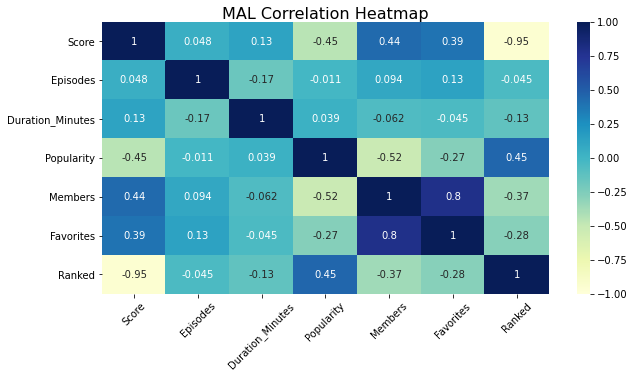

In [9]:
#correlation between numerical variables
fig, ax = plt.subplots(figsize=(10,5))    
mal_corr = sns.heatmap(mal.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu")
mal_corr.set_title('MAL Correlation Heatmap', fontdict={'fontsize':16}, pad=1);

plt.xticks(rotation=45)
plt.show()

The heatmap shows the correlation between the numerical variables. There is a negative and positive relationship based on how light and dark each block is. Those who fall in the negative relationship contains a negative value with a light color block and it increases positively as it progresses towards a positive value and darker color block.     

The heatmap shows the **Ranked** and **Score** variables have the most negative correlated relationship. An assumption for this reason is due to the meaning behind the variables. Animes are placed in rankings based on the score they are given by the community. If animes are scored close to 10, they are placed in rankings close to 1, and vice versa if they are scored lower than 10 then they are ranked away from 1.

The positive relationships who hold a positive 1 value will be ignored because it regards to variables being correlated to their same variable. The next highest positive value, which will indicate the most positive correlated relationship are from **Members + Favorites**. An assumption may be that members who enjoyed the anime they watched would also add it as a favorite for themselves. Thus, creating a positive correlation.

### **RQ1. How many animes were produced in each 'Type', 'Source', and 'Rating' categories?**

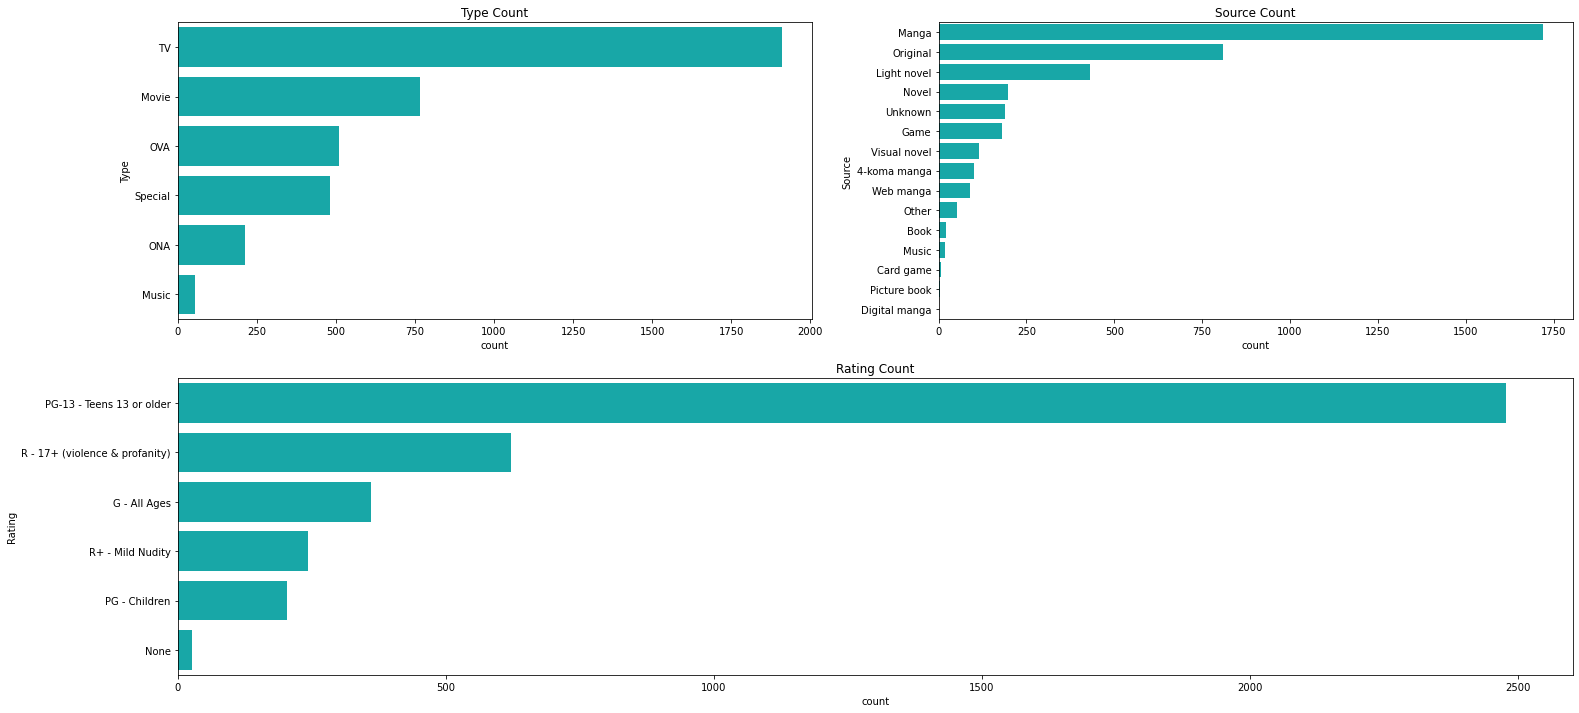

In [10]:
# Create 3 count plots from descending order for each variable categories
f, ax = plt.subplots(figsize=(25, 12))
plt.subplot(2, 2, 1)
type_count_plot = sns.countplot(y = 'Type', data = mal, order = mal['Type'].value_counts().index, color = 'c').set_title("Type Count")

plt.subplot(2, 2, 2)
source_count_plot = sns.countplot(y = 'Source', data = mal, order = mal['Source'].value_counts().index, color = 'c').set_title("Source Count")

plt.subplot(2, 1, 2)
rating_count_plot = sns.countplot(y = 'Rating', data = mal, order = mal['Rating'].value_counts().index, color = 'c').set_title("Rating Count")

plt.show()

#### <span style="background-color: #FFFF00"> RQ1: *Analysis* </span>
Count plots were created from descending order for 'Type', 'Source' and 'Rating'. This identifies which categories for each variable produced the most amount of animes.

> **Type**: 'Type' has 6 categories. TV produced the most with ~2,000 animes while Music has the least with <100. <br />

> **Source**: 'Source' has 12 categories. Manga produced the most with ~1,750 animes while Digital Manga has he least with <50.

> **Rating**: 'Rating' has 6 categories. PG-13- Teens 13 or older produced the most with ~2,500 while Children has the least with <300

Based on the three graphs, we may say animes are more focused on mangas that are PG-13 and would produce them into television. 

### **RQ2. What is the relationship like between 'Score' and 'Members'**

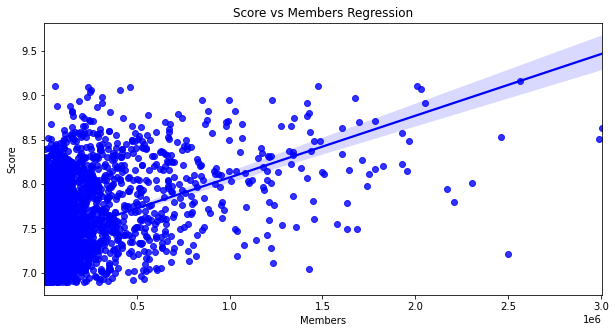

In [11]:
# creating linear regression plot
f, ax = plt.subplots(figsize=(10, 5))
score_member_reg_plot = sns.regplot(x='Members', y='Score', data=mal,  color='Blue').set_title("Score vs Members Regression")

#### <span style="background-color: #FFFF00"> RQ2: *Analysis* </span>
A linear regression plot shows there is a positive correlation from the way members score the animes they watch, where majority of the members score their animes from 7-8.5. 

### **RQ3. What is the distribution like in 'Score' and 'Members' for each category in 'Type', 'Source', and 'Rating'?**

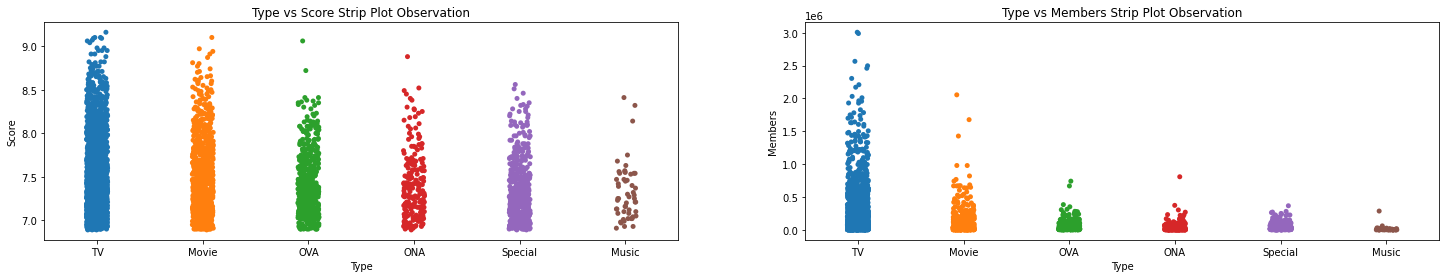

In [12]:
# strip plot for 'Type'
fig, ax = plt.subplots(1, 2, figsize = (25, 4))
type_score_strip_plot = sns.stripplot(x='Type', y='Score', data=mal, jitter=True, ax=ax[0]).set_title("Type vs Score Strip Plot Observation")
type_members_strip_plot = sns.stripplot(x='Type', y='Members', data=mal, jitter = True, ax=ax[1]).set_title("Type vs Members Strip Plot Observation")
plt.show()

#### <span style="background-color: #FFFF00"> RQ3a: *Analysis* </span>
The strip plots displays TV has the most frequency in terms of Score and Members, followedd by Movie.

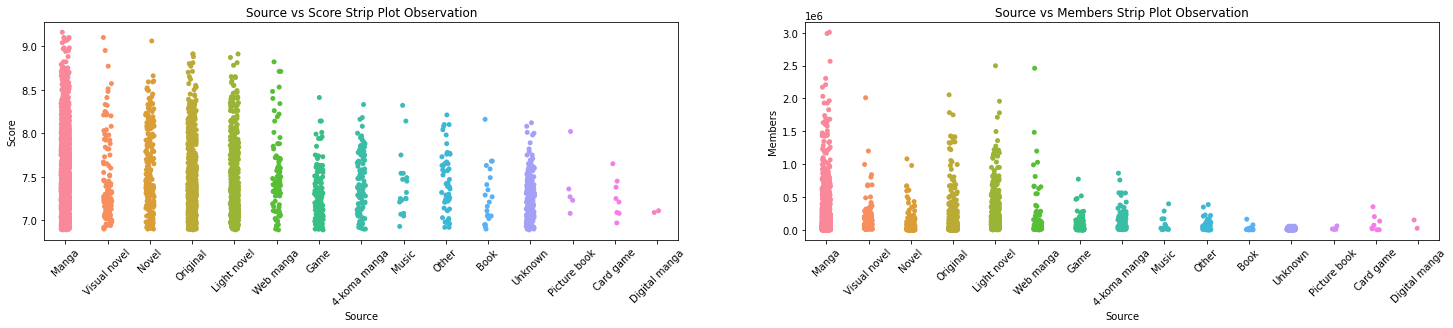

In [13]:
# strip plot for 'Source'
fig, ax = plt.subplots(1, 2, figsize = (25, 4))
plt.subplot(1, 2, 1)
source_score_strip_plot = sns.stripplot(x='Source', y='Score', data=mal, jitter=True).set_title("Source vs Score Strip Plot Observation")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
source_members_strip_plot = sns.stripplot(x='Source', y='Members', data=mal, jitter = True).set_title("Source vs Members Strip Plot Observation")
plt.xticks(rotation=45)

plt.show()

#### <span style="background-color: #FFFF00"> RQ3b: *Analysis* </span>
Manga holds the majority of frequent scores as well as members.

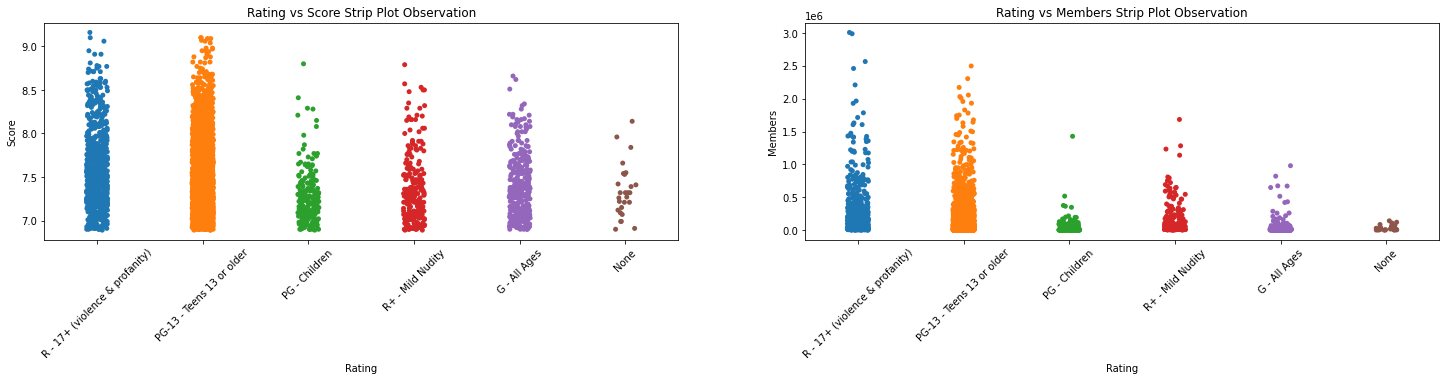

In [14]:
# strip plot for 'Rating'
fig, ax = plt.subplots(1, 2, figsize = (25, 4))
plt.subplot(1, 2, 1)
rating_score_strip_plot = sns.stripplot(x='Rating', y='Score', data=mal, jitter=True).set_title("Rating vs Score Strip Plot Observation")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
rating_members_strip_plot = sns.stripplot(x='Rating', y='Members', data=mal, jitter = True).set_title("Rating vs Members Strip Plot Observation")
plt.xticks(rotation=45)

plt.show()

#### <span style="background-color: #FFFF00"> RQ3c: *Analysis* </span>
PG-13 has the most frequent scores and members

#### <span style="background-color: #FFFF00"> RQ3: *Analysis* </span>
The strip plots overall shows where variable's categories are placed and how frequent they occur. It shows comparisons between other categories in how well they do. Overall, the strip plots that compares between scores are well spread, however, members tend to frequent way lower than the highest category.
### **RQ4. How many animes were produced in each genre and what are their average scores?**

In [15]:
# new dataframe that only includes studios, members, score, title and genres; splitting genres
mal_genres = mal[['Studios','Members', 'Score', 'Title','Genres']].copy()
mal_genres = (pd.concat( (mal_genres.Genres.str.split(', ', expand=True), 
          mal_genres[['Studios','Members', 'Score', 'Title']]),
          axis=1)
   .melt(id_vars=['Studios','Members', 'Score', 'Title'], value_name='Genres')
   .dropna())
mal_genres.drop(['variable'], axis = 1, inplace = True)

In [16]:
# new dataframe that only includes genres, score and title; splitting genres
mal_a = mal[['Studios','Members', 'Score', 'Title', 'Genres']].copy()
mal_a = (pd.concat( (mal_a.Genres.str.split(', ', expand=True), 
          mal_a[['Studios','Members', 'Score', 'Title']]),
          axis=1)
   .melt(id_vars=['Studios','Members', 'Score', 'Title'], value_name='Genres')
   .dropna()
   .drop(['variable'], axis = 1, inplace = True))

In [17]:
# grouping each genre, counting how many animes were produced and gathering their average
genre_count_score_avg = (mal_genres.groupby('Genres') 
       .agg(count=('Title', 'size'), Avg_Score=('Score', 'mean')) 
       .reset_index()
       .sort_values(['count'],ascending=False)
       .head(50))

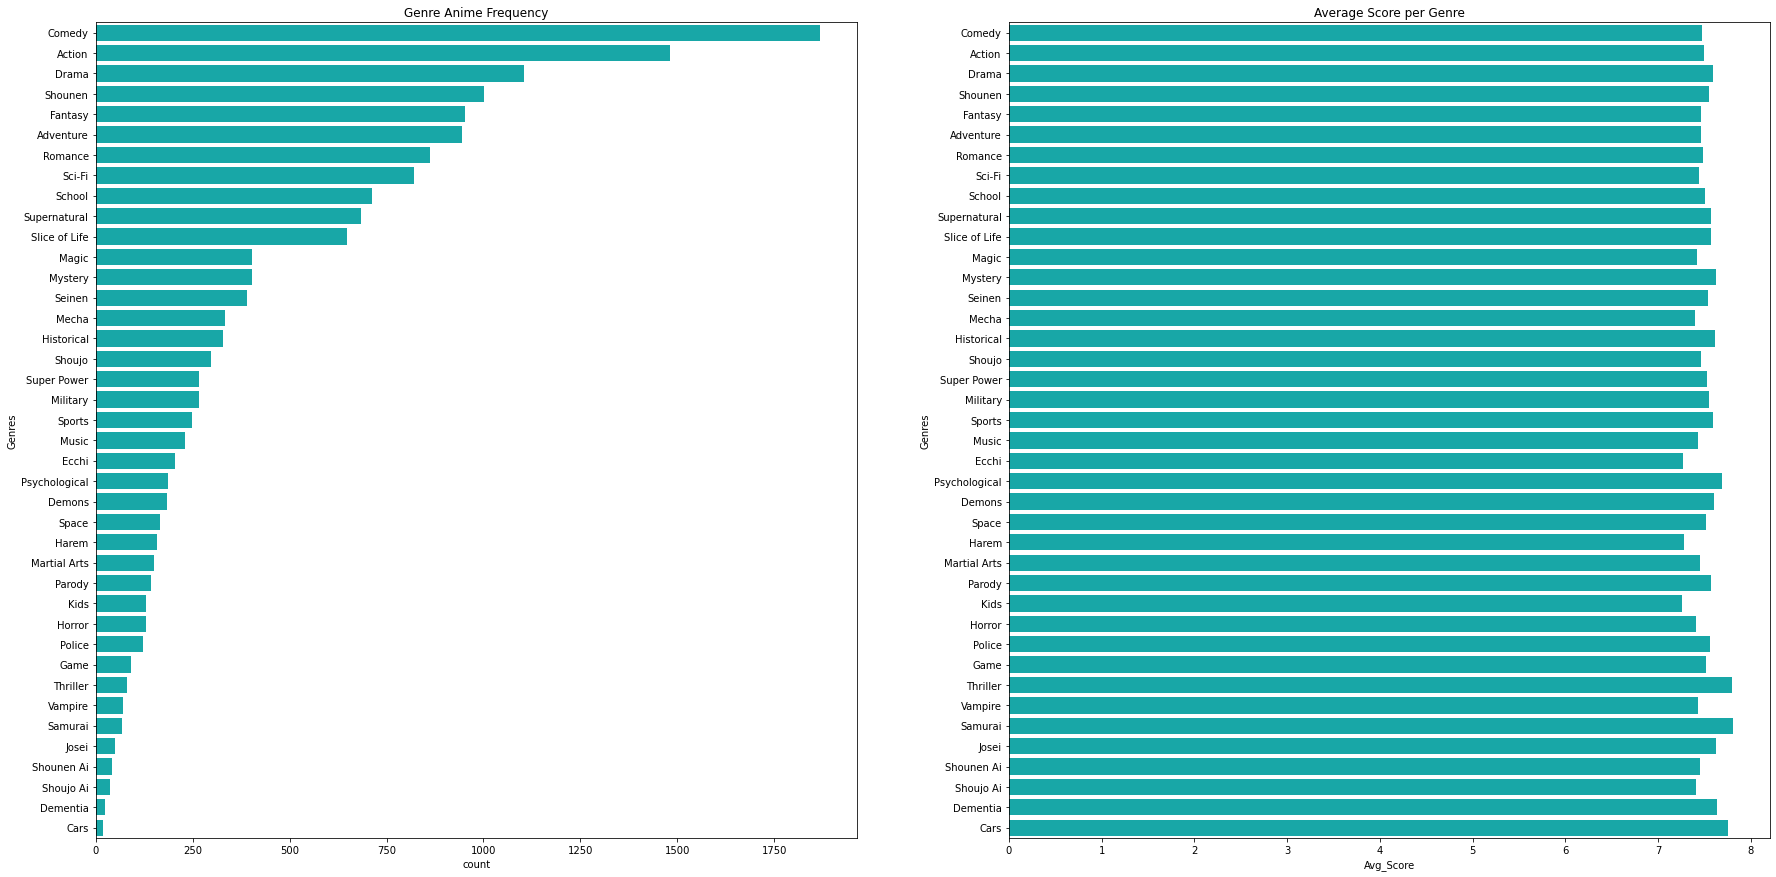

In [18]:
# barplots 
f, ax = plt.subplots(figsize=(30, 15))
plt.subplot(1, 2, 1)
genre_freq = sns.barplot(x="count", y="Genres", data=genre_count_score_avg, color = 'c').set_title('Genre Anime Frequency')

plt.subplot(1, 2, 2)
genre_avg_score = sns.barplot(x="Avg_Score", y="Genres", data=genre_count_score_avg, color = 'c').set_title('Average Score per Genre')
plt.show()

#### <span style="background-color: #FFFF00"> RQ4: *Analysis* </span>
The top 5 genres that have 1,000 and above animes are Comedy, Action, Drama, Shounen, and Fantasy with them all having and average score around 7.5

### **RQ5 What is the timeline when genres occurred over the years?**

In [19]:
mal['Start_Year'] = pd.DatetimeIndex(mal['Start_Date']).year

In [20]:
# creating dataframe that explodes genres
genres = mal['Genres'].str.get_dummies(sep = ", ")
mal_1 = (pd.concat([mal, genres], axis=1)
                       .drop(["Genres"], axis=1))

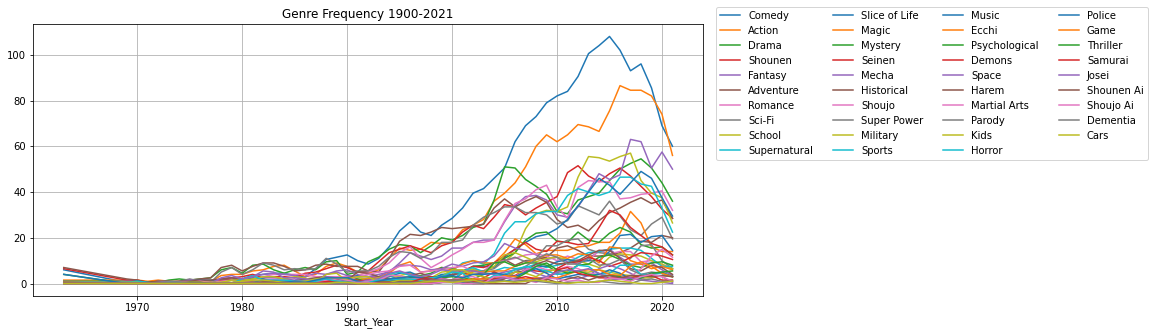

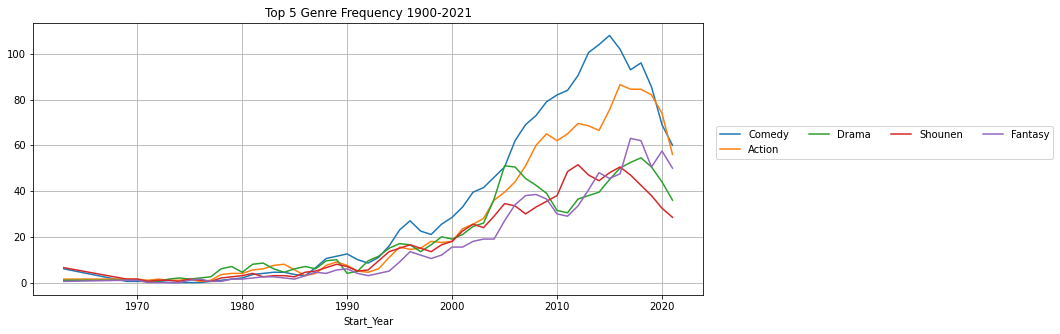

In [21]:
# Grouping Genres by year and see frequency of occurrences over the years
genres_1 = (mal_1.iloc[:, 15:-1] 
              .sum() 
              .sort_values(ascending=False) 
              .head(50) 
              .index.values 
              )
genres_2 = (mal_1.iloc[:, 15:-1] 
              .sum() 
              .sort_values(ascending=False) 
              .head(5) 
              .index.values 
              )
#-------
genre_occ_1 = (mal_1.iloc[:, 4:]
                .groupby("Start_Year")
                .sum()
               ).loc["1900":"2021", genres_1]
genre_occ_2 = (mal_1.iloc[:, 4:]
                .groupby("Start_Year")
                .sum()
               ).loc["1900":"2021", genres_2]
#----------

# graphing time series of genres over the years
genre_occ_plot_1 = (genre_occ_1.rolling(2)
                  .mean().plot(figsize=(12,5), 
                  title="Genre Frequency 1900-2021")
                  .legend(loc=(1.01, 0.01), ncol=4, bbox_to_anchor=(1.02, 0.5)))
plt.grid()
plt.show()

genre_occ_plot_2 = (genre_occ_2.rolling(2)
                    .mean().plot(figsize=(12,5), 
                    title="Top 5 Genre Frequency 1900-2021")
                    .legend(loc=(1.01, 0.01), ncol=4, bbox_to_anchor=(1.02, 0.5)))
plt.grid()
plt.show()

#### <span style="background-color: #FFFF00"> RQ5: *Analysis* </span>
Two time series line graphs are displayed, the top containing all genres and the bottom displaying the top 5 genres that holds the most animes.

The top graph shows a distinction on how popular and unpopular certain genres are. A lot of genres tend to fall in being around 20 animes or so from 1900-2020. However, the more popular genres began to grow since mid 1995, and increased even more passed 2000 and 2010. Comedy took a biggest jump and peaked in being in 100+ animes in around 2015.

### **RQ6: How many animes were produced by each studio and what are their average scores?**

In [22]:
# Analysis
mal_studios = mal[['Studios', 'Score', 'Members','Title', 'Source', 'Type', 'Rating']].copy()
mal_studios = (pd.concat( (mal_studios.Studios.str.split(', ', expand=True), 
          mal_studios[['Score', 'Members','Title', 'Source', 'Type','Rating']]),
          axis=1)
   .melt(id_vars=['Score', 'Members','Title', 'Source', 'Type','Rating'], value_name='Studios')
   .dropna())
mal_studios.drop(['variable'], axis = 1, inplace = True)

In [23]:
# group each studio; count how many animes were produced and get average score + genres of all animes
studio_count_score_avg = (mal_studios.groupby('Studios') 
       .agg(count=('Title', 'size'), Avg_Score=('Score', 'mean')) 
       .reset_index()
       .sort_values(['count'],ascending=False)
       .head(50))

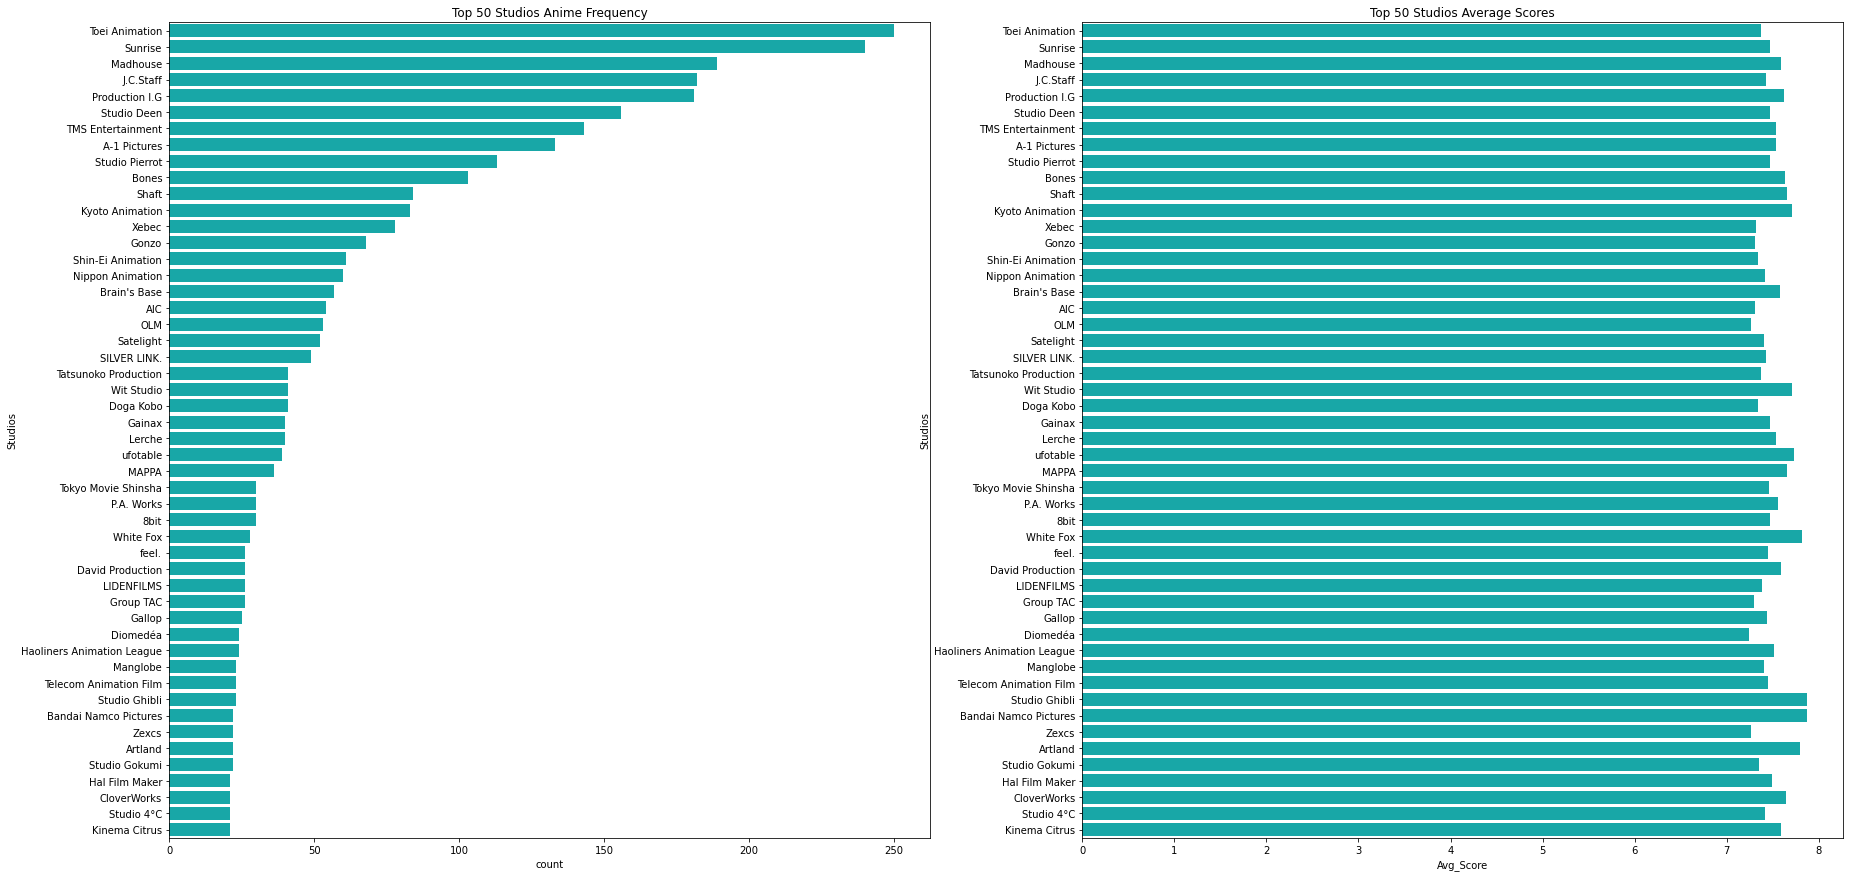

In [24]:
f, ax = plt.subplots(figsize=(30, 15))
plt.subplot(1, 2, 1)
studio_freq = sns.barplot(x="count", y="Studios", data=studio_count_score_avg, color = 'c').set_title('Top 50 Studios Anime Frequency')

plt.subplot(1, 2, 2)
studio_avg_score = sns.barplot(x="Avg_Score", y="Studios", data=studio_count_score_avg, color = 'c').set_title('Top 50 Studios Average Scores')
plt.show()

#### <span style="background-color: #FFFF00"> RQ6: *Analysis* </span>

There were over 100 studios present in the dataframe. Animes were counted for each studio and the top 50 studios that produced the most are seen in the bar graphs shown above. Toei Animation, Sunrise, Madhouse, J.C Staff and Produection I.D take the lead for being the top 5 studios of producing over 170 animes than other studios and having average scores around 7.5.


### **RQ7: What is the timeline when studios occurred over the years?**

In [25]:
# creating dataframe that explodes genres
studios = mal['Studios'].str.get_dummies(sep = ", ")
mal_3 = (pd.concat([mal, studios], axis=1)
                       .drop(["Studios"], axis=1))

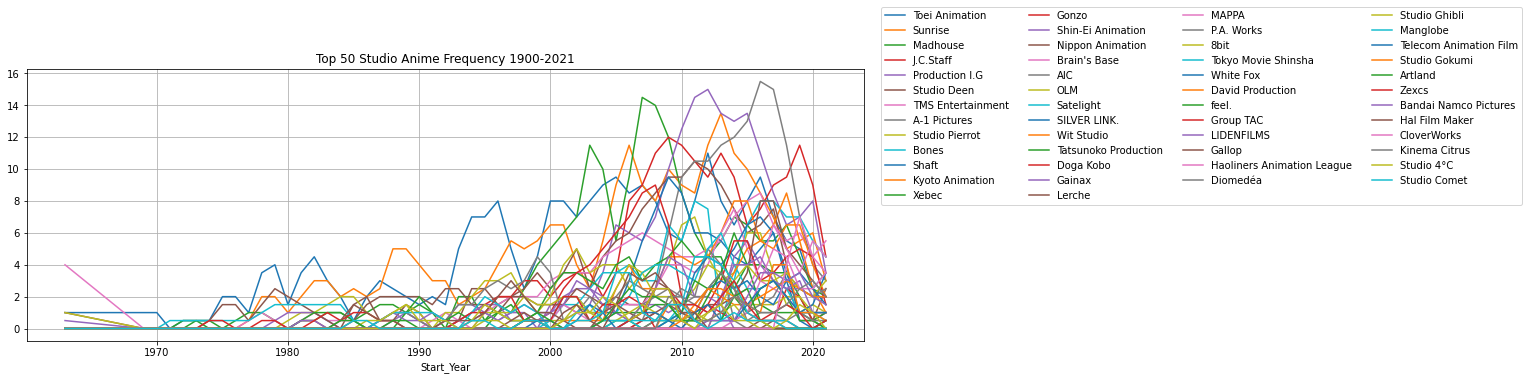

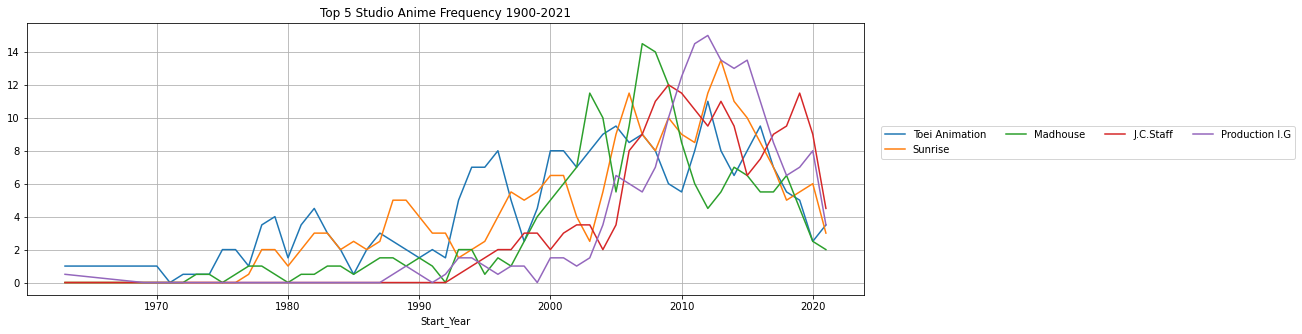

In [26]:
# Grouping studios by year and see frequency of occurrences
studios_1 = (mal_3.iloc[:, 15:-1] 
              .sum() 
              .sort_values(ascending=False) 
              .head(50) 
              .index.values 
              )
studios_2 = (mal_3.iloc[:, 15:-1] 
              .sum() 
              .sort_values(ascending=False) 
              .head(5) 
              .index.values 
              )
#---
studio_occ_1 = (mal_3.iloc[:, 4:]
                .groupby("Start_Year")
                .sum()
               ).loc["1900":"2021", studios_1]

studio_occ_2 = (mal_3.iloc[:, 4:]
                .groupby("Start_Year")
                .sum()
               ).loc["1900":"2021", studios_2]
#---
# graphing time series of studios over the years
studio_occ_plot = (studio_occ_1.rolling(2)
                  .mean().plot(figsize=(15,5), 
                  title="Top 50 Studio Anime Frequency 1900-2021")
                  .legend(loc=(1.01, 0.01), ncol=4, bbox_to_anchor=(1.02, 0.5)))
plt.grid()

# graphing time series of studios over the years
studio_occ_plot_2 = (studio_occ_2.rolling(2)
                  .mean().plot(figsize=(15,5), 
                  title="Top 5 Studio Anime Frequency 1900-2021")
                  .legend(loc=(1.01, 0.01), ncol=4, bbox_to_anchor=(1.02, 0.5)))
plt.grid()
plt.show()

#### <span style="background-color: #FFFF00"> RQ7: *Analysis* </span>
The two graphs are similar to the time series line graphs seen earlier with genres. The top 50 studios are displayed in the top graph. A distinction can be made which studios rose past the year 2000 and those who maintained their same low consistency. The bottom graph shows the top 5 studios that produced the most animes from anywhere around 4-16, and where they began to rise after 2000.
# **Overall Analysis**
This section will discuss the overall analysis that was gathered from the exploratory analysis

In [27]:
# group each studio; count how many animes were produced and get average score + genres of all animes
pd.set_option('max_colwidth', None)

studio_analysis = (mal_studios.groupby('Studios') 
       .agg(count=('Title', 'size'), Avg_Score=('Score', 'mean'), Tot_Members = ('Members', 'sum'), Source = ('Source', 'unique'), 
            Type = ('Type', 'unique'), Rating = ('Rating', 'unique')) 
       .reset_index()
       .sort_values(['count'],ascending=False)
       .head(5))

studio_genre_analysis = (mal_genres.groupby('Studios') 
       .agg(count=('Title', 'size'), Genres=('Genres', 'unique')) 
       .reset_index()
       .sort_values(['count'],ascending=False)
       .head(6))
studio_genre_analysis.drop(['count'], axis = 1, inplace = True)
studio_genre_analysis = studio_genre_analysis[studio_genre_analysis["Studios"].str.contains("Studio Deen")==False]

In [28]:
comedy = mal_genres[mal_genres['Genres'].str.match('Comedy')]
action = mal_genres[mal_genres['Genres'].str.match('Action')]
drama = mal_genres[mal_genres['Genres'].str.match('Drama')]
shounen = mal_genres[mal_genres['Genres'].str.match('Shounen')]
fantasy = mal_genres[mal_genres['Genres'].str.match('Fantasy')]

toei = mal_studios[mal_studios['Studios'].str.match('Toei Animation')]
sunrise = mal_studios[mal_studios['Studios'].str.match('Sunrise')]
madhouse = mal_studios[mal_studios['Studios'].str.match('Madhouse')]
jc = mal_studios[mal_studios['Studios'].str.match('J.C.Staff')]
ig = mal_studios[mal_studios['Studios'].str.match('Production I.G')]

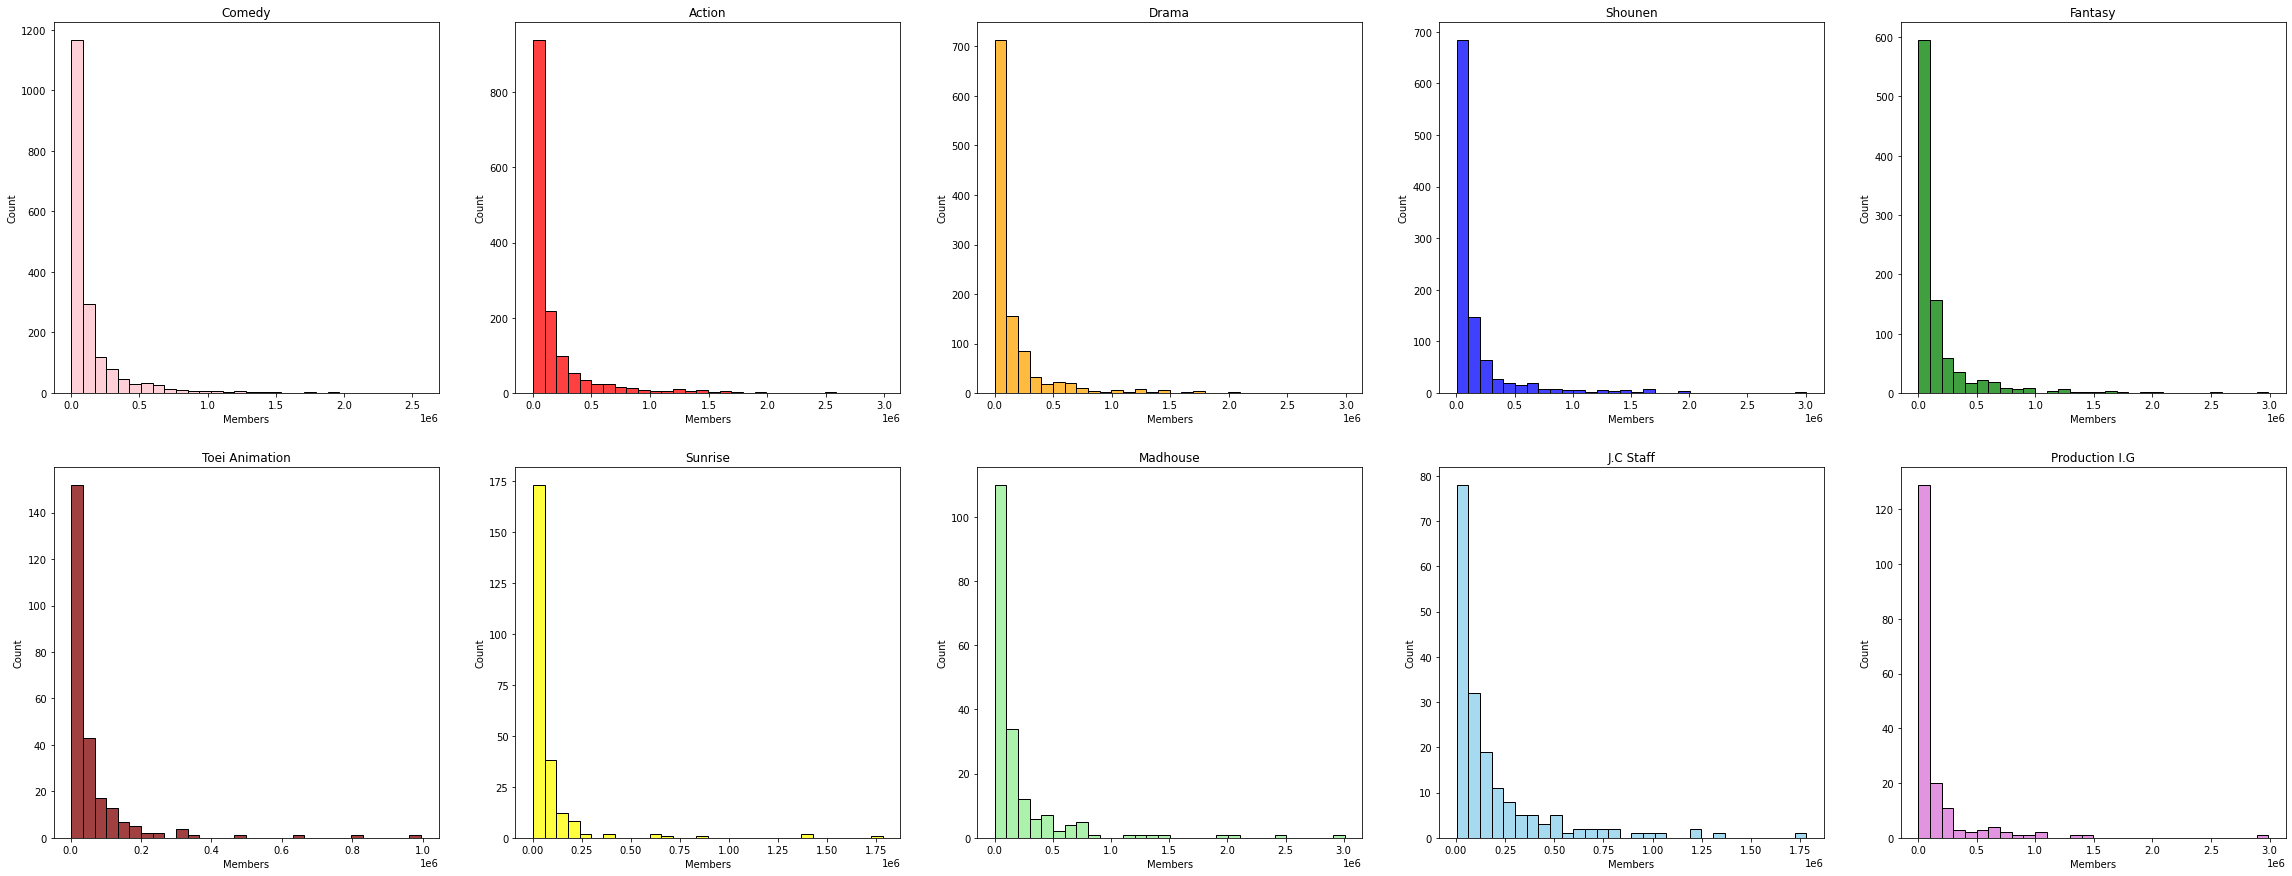

In [29]:
f, ax = plt.subplots(figsize=(40, 15))

plt.subplot(2, 5, 1)
comedy_hist = sns.histplot(data=comedy, x="Members", color= 'pink', bins=30).set_title("Comedy")

plt.subplot(2, 5, 2)
action_hist = sns.histplot(data=action, x="Members", color = 'red', bins = 30).set_title("Action")

plt.subplot(2, 5, 3)
drama_hist = sns.histplot(data=drama, x="Members", color = 'orange', bins = 30).set_title("Drama")

plt.subplot(2, 5, 4)
shounen_hist = sns.histplot(data=shounen, x="Members", color = 'blue', bins = 30).set_title("Shounen")

plt.subplot(2, 5, 5)
fantasy_hist = sns.histplot(data=fantasy, x="Members", color = 'green', bins = 30).set_title("Fantasy")

plt.subplot(2, 5, 6)
toei_hist = sns.histplot(data= toei, x="Members", color = 'maroon', bins = 30).set_title("Toei Animation")

plt.subplot(2, 5, 7)
sunrise_hist = sns.histplot(data= sunrise, x="Members", color = 'yellow', bins = 30).set_title("Sunrise")

plt.subplot(2, 5, 8)
madhouse_hist = sns.histplot(data= madhouse, x="Members", color = 'lightgreen', bins = 30).set_title("Madhouse")

plt.subplot(2, 5, 9)
jc_hist = sns.histplot(data= jc, x="Members", color = 'skyblue', bins = 30).set_title("J.C Staff")

plt.subplot(2, 5, 10)
ig_hist = sns.histplot(data= ig, x="Members", color = 'orchid', bins = 30).set_title("Production I.G")

plt.show()

In [30]:
studio_analysis

,Studios,count,Avg_Score,Tot_Members,Source,Type,Rating
286,Toei Animation,250,7.372680,14252791,"[Manga, Original, Music, Novel, Other, Unknown, Picture book, Visual novel, Light novel, Book, Game]","[TV, Movie, Special, Music, OVA, ONA]","[PG-13 - Teens 13 or older, R - 17+ (violence & profanity), G - All Ages, PG - Children, R+ - Mild Nudity, None]"
266,Sunrise,240,7.473958,18395736,"[Manga, Original, Web manga, Novel, Unknown, Light novel, Other, Music, Game, Card game, Picture book]","[TV, Movie, Special, OVA, ONA, Music]","[PG-13 - Teens 13 or older, R - 17+ (violence & profanity), R+ - Mild Nudity, G - All Ages, PG - Children]"
153,Madhouse,189,7.586667,39915018,"[Manga, Novel, Original, Web manga, Light novel, Game, Other, Unknown, Visual novel]","[TV, Movie, OVA, Special, Music]","[PG-13 - Teens 13 or older, R+ - Mild Nudity, R - 17+ (violence & profanity), PG - Children, G - All Ages, None]"
122,J.C.Staff,182,7.429066,34612054,"[Manga, Light novel, Visual novel, Original, 4-koma manga, Web manga, Card game, Unknown, Other, Game]","[TV, Movie, Special, ONA, OVA]","[PG-13 - Teens 13 or older, R - 17+ (violence & profanity), R+ - Mild Nudity, G - All Ages, None, PG - Children]"
199,Production I.G,181,7.627901,28037923,"[Manga, Novel, Original, Unknown, Game, Web manga, Light novel, Visual novel, 4-koma manga, Other]","[TV, OVA, Movie, Special, Music, ONA]","[PG-13 - Teens 13 or older, R - 17+ (violence & profanity), R+ - Mild Nudity, PG - Children, G - All Ages, None]"


In [31]:
studio_genre_analysis

,Studios,Genres
394,Toei Animation,"[Comedy, Mystery, Action, Adventure, Drama, Sci-Fi, Demons, Fantasy, Slice of Life, Game, Mecha, Historical, Magic, Kids, Sports, Horror, Shoujo, Romance, Shounen, Psychological, Super Power, School, Music, Supernatural, Military, Martial Arts, Space, Ecchi, Seinen, Shounen Ai]"
353,Sunrise,"[Action, Drama, Slice of Life, Adventure, Comedy, Music, Military, Sci-Fi, Parody, Shounen, Fantasy, Mecha, Space, Game, School, Romance, Mystery, Psychological, Super Power, Magic, Kids, Ecchi, Samurai, Thriller, Historical, Demons, Police, Sports, Supernatural, Martial Arts, Seinen, Shoujo, Shoujo Ai]"
190,Madhouse,"[Action, Drama, Comedy, Mystery, Adventure, Dementia, Game, Music, Sports, Sci-Fi, Fantasy, Slice of Life, Horror, Historical, Psychological, Romance, Ecchi, Police, Shounen, Supernatural, School, Seinen, Kids, Super Power, Military, Magic, Shoujo, Demons, Josei, Parody, Mecha, Space, Cars, Thriller, Martial Arts, Samurai, Vampire]"
152,J.C.Staff,"[Comedy, Adventure, Music, Drama, Ecchi, Action, Slice of Life, Game, Mystery, Dementia, Demons, Magic, Harem, Sci-Fi, Romance, Supernatural, Mecha, Police, Military, Josei, School, Parody, Fantasy, Historical, Shounen, Psychological, Super Power, Shoujo Ai, Kids, Horror, Shoujo, Shounen Ai, Seinen, Thriller, Vampire, Space, Sports]"
257,Production I.G,"[Comedy, Action, Slice of Life, Mystery, Military, Sports, Josei, Adventure, Shounen, Drama, Supernatural, Music, School, Sci-Fi, Romance, Mecha, Historical, Horror, Police, Demons, Psychological, Fantasy, Magic, Shoujo, Parody, Martial Arts, Super Power, Vampire, Samurai, Ecchi, Thriller, Seinen, Space]"


### **Analysis Discussion**
What is being shown in this section are histograms from the top 5 genres and top 5 studios based on their member frequencies. Two dataframes are displayed below the histograms that involves the top 5 studios' total count of animes produced, average scores, total members and what sources, types, ratings and genres they used. The categorical columns in the dataframes has their values arranged in descending order, meaning where studios focused on the most to least from left to right of the values displayed. This will provide an easier insight when discussing the success of the top 5 studios.

##### ***Exploratory Analysis and Histograms***
The Exploratory Analysis section (EA) has shown the top 5 genres that animes are well known to be in and have an average score of around 7.5 are Comedy, Action, Drama, Shounen, and Fantasy. The genres gained more use in animes after the year 2000 and grew even more past 2010. The histograms displayed in this section for the genres provides a visualization where majority of members frequent in when watching those genres. All the genre histograms are skewed to the right, and majority of genres frequent in members in 500,000 and less.

The EA has also shown the top 5 studios that majority of animes came from in the dataframe and have average scores of around 7.5 are Toei Animation, Sunrise, Madhouse, J.C.Staff, and Production I.G. Before the year 2000, 4 of the studios were already creating 1-4 animes when anime started to become known. All 5 studios then created even more animes after 2000 where they created from anywhere 4-16 animes within each or every other year. The histograms in this section demonstrates how many members each studio receives based on what animes they create. They are all skewed to the right, and some frequent in members majority in <200,000 and <500,000.

##### ***Exploratory Analysis and Categorical Columns***
It was seen in the EA where animes fell into for each category in terms of the Type, Source, Ratings and Genres variables. The following will explain the categories that held the most frequencies and their frequencies in terms of score and members. 

> **Type** TV <br />
TV resulted in ~2,000 animes. Most members were 1 million and below and scored animes from 7-8.5.

>**Source** Manga <br />
Manga resulted in ~1,750 animes. Most members were 1 million and below and scored animes from 7-9.

> **Rating** PG-13 <br />
PG-13 resulted in ~2,500 animes. Most members were 1.5 million and below and scored animes from 7-8.5.

The studio_analysis and studio_genre_analysis dataframes in this section lists the top 5 studios who created the most animes to least. As mentioned before, each categorical columns for the dataframes arranged values from most to least used. It can be seen for all the top 5 studios focused on producing animes based on mangas and releasing them as television series for a PG-13 audience. As for genres, the studios either included 1-2 genres that were also the top 5 genres discussed earlier.

# **Conclusion**
This analysis has shown what led studios to become successful with the animes they produced. Studios focused on creating animes based on mangas and creating them into television series for a PG-13 audience. They worked on their projects since around the 1980s by just 1-2 animes, but ultimately increased to 4-14 animes for each year towards 2021. They also incorporated genres that were well known to gain majority of the members. Based on the actions studios have done, they were able to reach a total of over 1 million members over the years.